In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
!unzip amexpert-2019.zip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
train.head()

In [0]:
consumer_data = pd.read_csv('customer_demographics.csv')
consumer_data.head()

In [0]:
mapping = pd.read_csv('coupon_item_mapping.csv')
mapping.head()

In [0]:
item = pd.read_csv('item_data.csv')
item.head()

In [0]:
transaction_data = pd.read_csv('customer_transaction_data.csv')
transaction_data.head()

In [0]:
campaign_data = pd.read_csv('campaign_data.csv')
campaign_data.head()

In [0]:
##### reading data done now will map data and create a single database

In [0]:
##### merging test with campaign_id
 result = pd.merge(campaign_data, train, on='campaign_id')
 result.head()

In [0]:
 #### merging result and consumer_data
 result1 = pd.merge(result, consumer_data, on='customer_id')
 result1.head()

In [0]:
 result2 = pd.merge(result1,mapping, on='coupon_id')
 result2.head()

In [0]:
 result3 = pd.merge(result2,item, on='item_id')
 result3.head()

In [0]:
result4 = pd.merge(result3,transaction_data, on=['item_id', 'customer_id'])
result4.head()

In [0]:
## combining data done and now we will handle the non-numeric data .

In [0]:
import seaborn as sns
sns.heatmap(result4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
print(result4.shape)
print(result4.marital_status.isnull().sum())
print(result4.no_of_children.isnull().sum())

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='redemption_status',hue='no_of_children',data=result4,palette='rainbow')


In [0]:
sns.set_style('whitegrid')
sns.countplot(x='redemption_status',hue='marital_status',data=result4,palette='rainbow')

In [0]:
### since the data in column no_of_children is about 1/3 it is better to delete that column . 
## And since the data in the the column marital status is 2/3 we will fit it using training set .

In [0]:
## converting each column to numric data .

In [0]:
result4 = result4.drop(['campaign_id','coupon_id','customer_id','item_id'],axis=1)
result4.head()

In [0]:
result4 = result4.drop(['id'],axis=1)
result4.head()

In [0]:
result4.head()

In [0]:
print(set(result4.campaign_type))
print(set(result4.age_range))
print(set(result4.rented))
print(set(result4.brand))
print(set(result4.brand_type))
print(set(result4.category))
print(set(result4.quantity))
print(set(result4.coupon_discount))
print(len(set(result4.brand)))
print(result4.age_range.isnull().sum())

In [0]:
map_campaign_type= {'Y':0,'X':1}
map_age ={'56-70':4, '70+':5, '26-35':1, '46-55':3, '18-25':0, '36-45':2}
map_brand_type = {'Local':0, 'Established':1}
## One hot encoding for thee column on quantity and brand
## quantity and discount stays as it is

In [0]:
type1= result4
type1['brand'].value_counts()
##dummy = pd.get_dummies(type1['category'])
##dummy.head()


In [0]:
print(type1.category.value_counts().sort_values(ascending = False).head(10))
top10 = [x for x in type1.category.value_counts().sort_values(ascending = False).head(10).index]

In [0]:
print(type1.brand.value_counts().sort_values(ascending = False).head(100))
top100 = [x for x in type1.brand.value_counts().sort_values(ascending = False).head(100).index]

In [0]:
for i in top10 :
    type1[i] = np.where(type1['category']==i,1,0)
type1[['category']+top10].head()

In [0]:
for i in top100 :
    type1[i] = np.where(type1['brand']==i,1,0)
type1[['brand']+top100].head()

In [100]:
type1.head()

,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,19/05/13,05/07/13,0,1,NaN,0,3,1,3,1636,1,Grocery,2012-06-07,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
type1 = type1.replace({'campaign_type':map_campaign_type})
type1 = type1.replace({'age_range' :map_age})
type1 = type1.replace({'brand_type':map_brand_type})
type1.head()


,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,19/05/13,05/07/13,0,1,NaN,0,3,1,3,1636,1,Grocery,2012-06-07,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import datetime
x = pd.to_datetime(type1['start_date'])
print(x)

In [0]:
y = pd.to_datetime(type1['end_date'])
print(y)

In [109]:
type1.head()

,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,19/05/13,05/07/13,0,1,NaN,0,3,1,3,1636,1,Grocery,2012-06-07,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
type1 = type1.drop(['start_date','end_date','date','no_of_children'],axis=1)
type1.head()

In [0]:
type1 = type1.drop(['category','brand'],axis =1)
type1.head()

In [0]:
type1 = type1.drop(['marital_status'],axis =1 )
type1.head()


In [0]:
X = type1
y = type1['redemption_status']
X = X.drop(['redemption_status'],axis = 1)
map_family = {'1':1, '2':2, '3':3, '4':4, '5+':5}
X = X.replace({'family_size' :map_family})

In [0]:
set(X.family_size)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.76850166919913


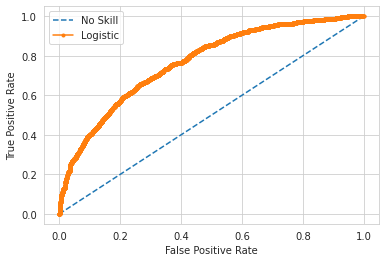

In [129]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print(lr_auc)
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
